In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from matplotlib import cm



Importamos los Dataset**

In [2]:
url = '/content/drive/MyDrive/Carpeta sin título/train.parquet'
data_train = pd.read_parquet(url)

In [3]:
test_url = '/content/drive/MyDrive/Carpeta sin título/test.parquet'
data_test = pd.read_parquet(test_url)

Comenzamos a realizar el **analisis exploratorio**

In [4]:
# Muestra las primeras filas
data_train.head()


,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


In [5]:
# Informacion general
data_train.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.464790e+05,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000,346479.000000,346479.000000,344757.000000,344757.000000
mean,7.040988e+09,9.664420e+03,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197,0.012792,0.048141,37.234363,-92.705415
std,8.802214e+06,4.703573e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432,0.112374,0.214065,5.550956,16.551071
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035988e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.453100,-100.784000
50%,7.043325e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,37.650100,-87.710800
75%,7.048431e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.137900,-81.174600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


In [6]:
# Muestra el numero de filas y comumna 
data_train.shape

(346479, 22)

In [7]:
# Muestra el tipo de variable
data_train.dtypes

id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

In [8]:
#veo los nombres de las columnas
data_train.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [4]:
# Revisamos existencia de valores nulos
data_train.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64

Dropeamos los duplicados de la columna descripcion

In [22]:
len(data_train['description'].unique())

254991

In [23]:
data_train.drop_duplicates(subset=["description"], inplace=True, keep='first')

In [24]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254991 entries, 0 to 346478
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   id                       254991 non-null  int64
 1   url                      254991 non-null  int64
 2   region                   254991 non-null  int64
 3   region_url               254991 non-null  int64
 4   price                    254991 non-null  int64
 5   type                     254991 non-null  int64
 6   sqfeet                   254991 non-null  int64
 7   beds                     254991 non-null  int64
 8   baths                    254991 non-null  int64
 9   cats_allowed             254991 non-null  int64
 10  dogs_allowed             254991 non-null  int64
 11  smoking_allowed          254991 non-null  int64
 12  wheelchair_access        254991 non-null  int64
 13  electric_vehicle_charge  254991 non-null  int64
 14  comes_furnished          254991 non-

In [25]:
data_train.isnull().sum()

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
category_price             0
dtype: int64

Implementar un modelo de clasificación con aprendizaje supervisado que permita clasificar el precio de las propiedades en venta, utilizando los datos que se han puesto a su disposición.​Para esto debe crear la columna category_price, en la cual se consideran las categorías
'low': Para precios entre 0 y 999 dólares (debe tomar valor 1 en el archivo con las predicciones).
'medium': Para precios entre 1000 y 1999 dólares (debe tomar valor 0 en el archivo con las predicciones).
'high': Para precios desde 2000 dólares en adelante (debe tomar valor 0 en el archivo con las predicciones).​Considerando esta categorización, el objetivo es predecir si una propiedad pertenece a la categoría de precios bajos (low).​

In [15]:
conditions = [
    (data_train['price'] >= 0) & (data_train['price'] <= 999),
    (data_train['price'] >= 1000)]
choices = ['1', '0']
data_train['category_price'] = np.select(conditions, choices).astype(int)

In [16]:
# Verificamos valores de la nueva columna y existencia de nulos
data_train.category_price.unique()

array([0, 1])

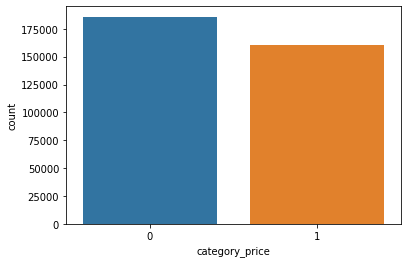

In [17]:
# Graficamos la distribución de la nueva columna
sns.countplot(x='category_price', data=data_train)

In [ ]:
import matplotlib.pyplot as ptl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b271e3e80>,
      dtype=object)

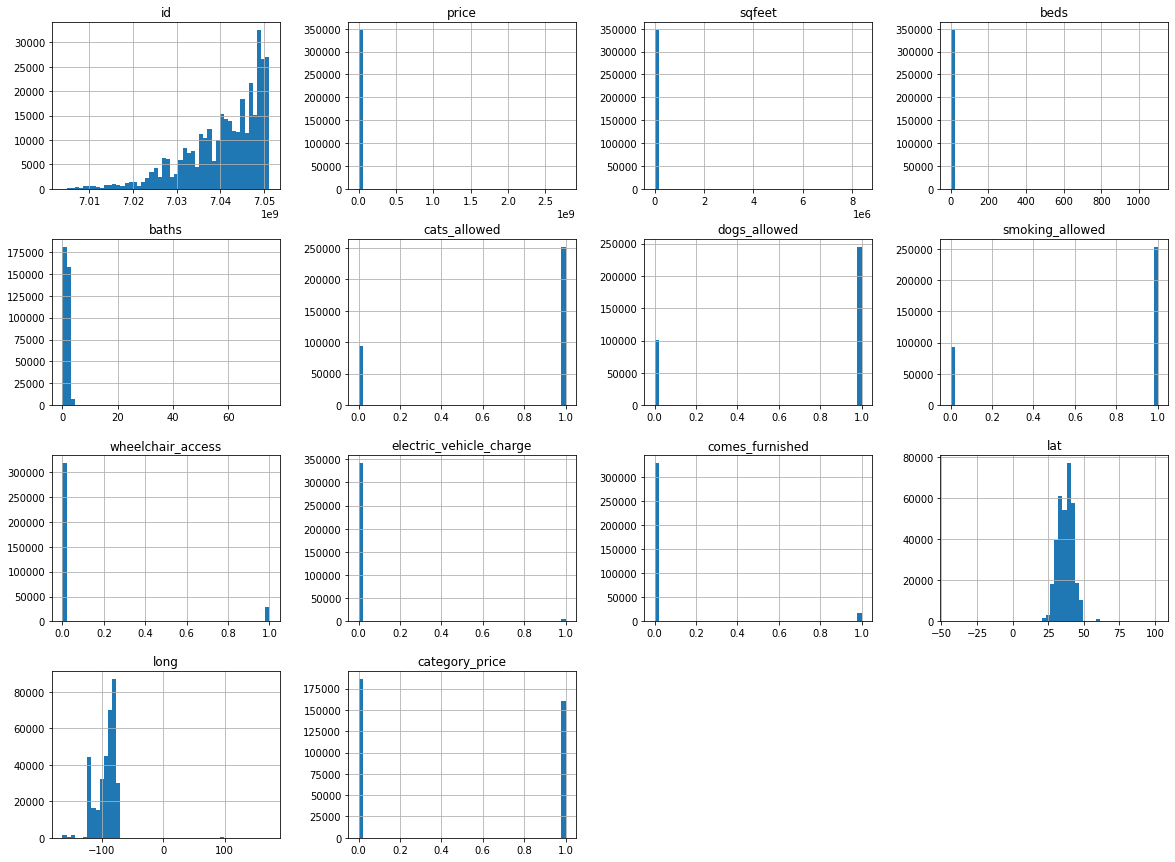

In [18]:
data_train.hist(bins=50, figsize=(20,15))

In [19]:
#para no perder datos .. reemplazo de nulos
data_train.category_price.fillna('unknown', inplace= True)
data_train

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,category_price
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id,0
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co,0
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va,0
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az,0
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,7050982281,https://evansville.craigslist.org/apa/d/evansv...,evansville,https://evansville.craigslist.org,672,apartment,660,1,1.0,1,...,0,0,laundry on site,None,https://images.craigslist.org/00x0x_9oaHKZ8Ilp...,"The pool, the office, the 24-hour on-site laun...",37.9591,-87.5293,in,1
346475,7049418251,https://sandiego.craigslist.org/ssd/apa/d/chul...,san diego,https://sandiego.craigslist.org,2122,apartment,1099,2,2.0,1,...,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00O0O_6QsU4p5WMh...,Seize your chance to live in our beautiful apa...,32.6279,-117.0370,ca,0
346476,7048268235,https://columbia.craigslist.org/apa/d/columbia...,columbia,https://columbia.craigslist.org,1014,apartment,1104,2,2.0,1,...,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00000_dpNWqzYhGK...,Tucked into the rolling landscape of Southeast...,33.9659,-80.9355,sc,0
346477,7026721229,https://nd.craigslist.org/apa/d/minot-open-con...,north dakota,https://nd.craigslist.org,935,apartment,1050,2,2.0,0,...,0,0,w/d in unit,detached garage,https://images.craigslist.org/00Z0Z_65g6Cty1RX...,Enjoy living at Southwood Apartments! Located ...,48.1995,-101.2800,nd,1


In [20]:
#Decodificación de las variables srt en int
encoder = preprocessing.LabelEncoder()
for column in data_train.columns:
    if data_train[column].dtype != ('int64' or 'float'):
        data_train[column]=encoder.fit_transform(data_train[column])

Crear el mapa de calor

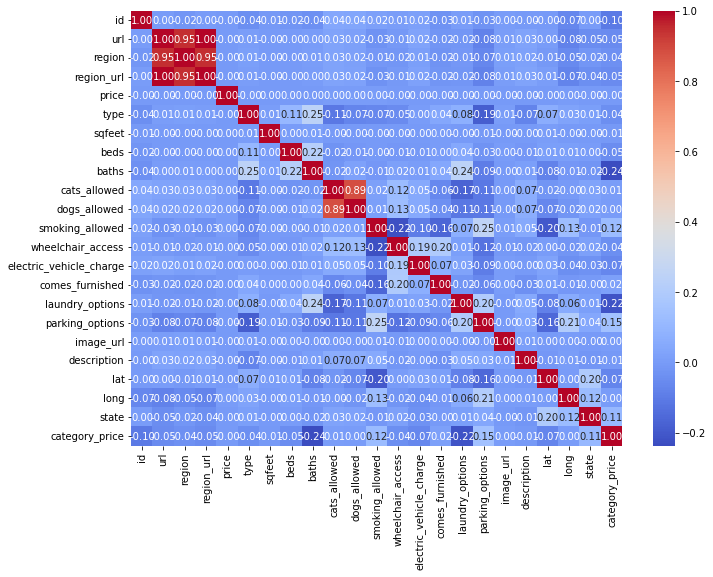

In [21]:
correlation = data_train.corr() #Cálculo delas correlaciones del dataframe para creación del mapa de calor
plt.figure(figsize = (11,8))
sns.heatmap(correlation, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm')
y = data_train['category_price']
important_features = data_train[['price','region','type', 'long']]

selección de las características más relevantes para el problema en cuestión

In [54]:
data_train = data_train.drop(columns= ['id', 'url', 'region_url', 'image_url',	'lat',	'long', 'description'], axis=1)

# tratamiento el dataset** data_test**

In [26]:
data_test.isnull().sum()

id                             0
url                            0
region                         0
region_url                     0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options             7855
parking_options            14005
image_url                      0
description                    0
lat                          196
long                         196
state                          0
dtype: int64

In [27]:

data_test[['sqfeet', 'beds', 'cats_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'lat', 'long']].corr()

,sqfeet,beds,cats_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
sqfeet,1.000000,0.065701,-0.055366,-0.012392,0.004852,0.002039,0.008386,0.019106
beds,0.065701,1.000000,-0.020588,-0.008532,-0.002996,-0.000578,0.009798,0.005749
cats_allowed,-0.055366,-0.020588,1.000000,0.123087,0.050117,-0.053430,-0.012750,0.034187
wheelchair_access,-0.012392,-0.008532,0.123087,1.000000,0.197551,0.198187,0.004990,-0.023264
electric_vehicle_charge,0.004852,-0.002996,0.050117,0.197551,1.000000,0.073366,0.028333,-0.055013
comes_furnished,0.002039,-0.000578,-0.053430,0.198187,0.073366,1.000000,0.005712,-0.027096
lat,0.008386,0.009798,-0.012750,0.004990,0.028333,0.005712,1.000000,-0.121483
long,0.019106,0.005749,0.034187,-0.023264,-0.055013,-0.027096,-0.121483,1.000000


In [28]:
data_test['type'].unique()

array(['manufactured', 'apartment', 'house', 'townhouse', 'condo',
       'duplex', 'cottage/cabin', 'loft', 'in-law', 'flat'], dtype=object)

In [29]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Aplicar el encoder a la columna "tipo_propiedad"
data_test['type'] = le.fit_transform(data_test['type'])

# Imprimir el dataframe resultante
data_test.head()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,ann arbor,https://annarbor.craigslist.org,8,1344,3,2.0,0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,vermont,https://vermont.craigslist.org,0,1050,2,1.0,0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,ann arbor,https://annarbor.craigslist.org,0,1150,2,2.0,1,1,...,1,0,0,w/d in unit,carport,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi
3,7048681802,https://fortcollins.craigslist.org/apa/d/fort-...,fort collins / north CO,https://fortcollins.craigslist.org,0,1280,2,2.5,1,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,co
4,7043597870,https://charlottesville.craigslist.org/apa/d/c...,charlottesville,https://charlottesville.craigslist.org,0,783,2,1.0,1,1,...,0,0,0,laundry on site,None,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,va


In [30]:
len(data_test['region'].unique())

398

In [31]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le1 = LabelEncoder()

# Aplicar el encoder a la columna "tipo_propiedad"
data_test['region'] = le1.fit_transform(data_test['region'])

# Imprimir el dataframe resultante
data_test.head()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,9,https://annarbor.craigslist.org,8,1344,3,2.0,0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,370,https://vermont.craigslist.org,0,1050,2,1.0,0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,9,https://annarbor.craigslist.org,0,1150,2,2.0,1,1,...,1,0,0,w/d in unit,carport,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi
3,7048681802,https://fortcollins.craigslist.org/apa/d/fort-...,112,https://fortcollins.craigslist.org,0,1280,2,2.5,1,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,co
4,7043597870,https://charlottesville.craigslist.org/apa/d/c...,53,https://charlottesville.craigslist.org,0,783,2,1.0,1,1,...,0,0,0,laundry on site,None,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,va


In [33]:
data_test['laundry_options'].unique()

array(['w/d in unit', 'w/d hookups', 'laundry on site', None,
       'laundry in bldg', 'no laundry on site'], dtype=object)

In [34]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le2 = LabelEncoder()

# Aplicar el encoder a la columna "tipo_propiedad"
data_test['laundry_options'] = le2.fit_transform(data_test['laundry_options'])

# Imprimir el dataframe resultante
data_test.head()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,9,https://annarbor.craigslist.org,8,1344,3,2.0,0,0,...,0,0,0,4,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,370,https://vermont.craigslist.org,0,1050,2,1.0,0,0,...,0,0,0,3,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,9,https://annarbor.craigslist.org,0,1150,2,2.0,1,1,...,1,0,0,4,carport,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi
3,7048681802,https://fortcollins.craigslist.org/apa/d/fort-...,112,https://fortcollins.craigslist.org,0,1280,2,2.5,1,1,...,0,0,0,4,attached garage,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,co
4,7043597870,https://charlottesville.craigslist.org/apa/d/c...,53,https://charlottesville.craigslist.org,0,783,2,1.0,1,1,...,0,0,0,1,None,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,va


In [48]:
data_test['parking_options'].unique()

array(['off-street parking', 'carport', 'attached garage', None,
       'street parking', 'detached garage', 'no parking', 'valet parking'],
      dtype=object)

In [49]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le3 = LabelEncoder()

# Aplicar el encoder a la columna "tipo_propiedad"
data_test['parking_options'] = le3.fit_transform(data_test['parking_options'])

# Imprimir el dataframe resultante
data_test.head()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,1478,9,11,8,1344,3,2.0,0,0,...,0,0,0,4,4,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,36645,370,381,0,1050,2,1.0,0,0,...,0,0,0,3,4,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,1328,9,11,0,1150,2,2.0,1,1,...,1,0,0,4,1,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi
3,7048681802,11863,112,117,0,1280,2,2.5,1,1,...,0,0,0,4,0,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,co
4,7043597870,5858,53,59,0,783,2,1.0,1,1,...,0,0,0,1,7,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,va


In [50]:
len(data_test['state'].unique())

51

In [51]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le4 = LabelEncoder()

# Aplicar el encoder a la columna "tipo_propiedad"
data_test['state'] = le4.fit_transform(data_test['state'])

# Imprimir el dataframe resultante
data_test.head()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,1478,9,11,8,1344,3,2.0,0,0,...,0,0,0,4,4,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,22
1,7032406876,36645,370,381,0,1050,2,1.0,0,0,...,0,0,0,3,4,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,46
2,7037022682,1328,9,11,0,1150,2,2.0,1,1,...,1,0,0,4,1,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,22
3,7048681802,11863,112,117,0,1280,2,2.5,1,1,...,0,0,0,4,0,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,5
4,7043597870,5858,53,59,0,783,2,1.0,1,1,...,0,0,0,1,7,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,45


In [52]:
data_test = data_test.drop(columns= ['id', 'url', 'region_url', 'image_url',	'lat',	'long', 'description'], axis=1)

In [53]:
data_test

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,9,8,1344,3,2.0,0,0,1,0,0,0,4,4,22
1,370,0,1050,2,1.0,0,0,1,0,0,0,3,4,46
2,9,0,1150,2,2.0,1,1,1,1,0,0,4,1,22
3,112,0,1280,2,2.5,1,1,0,0,0,0,4,0,5
4,53,0,783,2,1.0,1,1,1,0,0,0,1,7,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38493,217,0,1180,2,2.0,1,1,0,1,0,0,4,2,1
38494,96,0,1138,3,2.0,1,1,1,0,0,0,3,4,43
38495,350,0,743,1,1.0,1,1,1,0,0,0,4,4,9
38496,219,5,1276,3,2.0,0,0,0,0,0,0,3,0,3


Preparando variables para entrenar el modelo

In [35]:
columnas_x = ['region', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed','dogs_allowed', 'smoking_allowed', 'wheelchair_access',
               'electric_vehicle_charge', 'comes_furnished', 'laundry_options','parking_options', 'state']
columna_y = ['category_price']

In [36]:
X = data_train.loc[:,columnas_x]
y = data_train.loc[:,columna_y]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,train_size=0.7)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((178493, 14), (76498, 14), (178493, 1), (76498, 1))

DecisionTreeClassifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
clf = DecisionTreeClassifier(max_depth = 5000, random_state = 22) 
clf.fit(X_train.values,y_train.values)
y_pred = clf.predict(X_test.values)

In [40]:
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

Ejecuto y Verifico las métricas

In [42]:
print('Feature importance: ', clf.feature_importances_)
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))

Feature importance:  [0.19449573 0.02973974 0.26694013 0.03102231 0.03821057 0.01368419
 0.01217053 0.01646632 0.00821176 0.00201601 0.00897184 0.08252127
 0.04475602 0.25079358]
Accuracy:  0.9034092394572407
Recall:  0.8824031350736363
F1 Score:  0.8831427622526925


Matriz Confusion

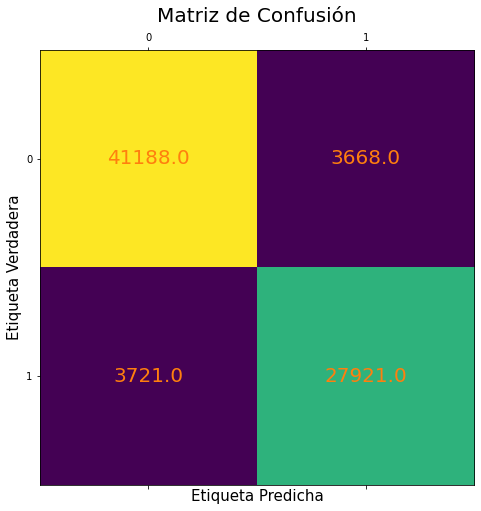

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

text_kwargs = dict(fontsize=20, color='C1')

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', **text_kwargs)

Ejecuto los datos del test

In [55]:
y_pred_final = clf.predict(data_test.values)

In [56]:
df = pd.DataFrame(y_pred_final,columns=['pred'])

In [58]:
#guardo la respuesta en un formato csv
df.to_csv(r"marybet.csv", index=False)